## **Notebook PC#05**
## Convolutional classifier for MNIST and CIFAR-10 databases.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Ariel Góes de Castro <br>
**Aluno(a):** Francisco Germano Vogt <br>


In [1]:
import tensorflow as tf
import os
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Reshape to be [samples][width][height][channels]
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                                 activation='relu',
                                 input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10)
model.summary()

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

# Saving the model to disk
model_json = model.to_json()
json_file = open("model_CNN_MNIST.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("model_CNN_MNIST.h5")
print("Model saved to disk")
os.getcwd()

2024-04-11 11:13:07.774724: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-11 11:13:07.984120: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-11 11:13:07.984192: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-11 11:13:08.013340: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-11 11:13:08.093471: I tensorflow/core/platform/cpu_feature_guar

Epoch 1/10


2024-04-11 11:13:13.082251: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-04-11 11:13:13.289219: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-04-11 11:13:13.522137: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-11 11:13:14.210734: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-11 11:13:15.027352: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fa2919b3270 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-11 11:13:15.027402: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 16

1875/1875 [==============================] - 13s 4ms/step - loss: 0.1967 - accuracy: 0.9400
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0853 - accuracy: 0.9750
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0644 - accuracy: 0.9808
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0518 - accuracy: 0.9844
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0451 - accuracy: 0.9863
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0385 - accuracy: 0.9879
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0339 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0337 - accuracy: 0.9895
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0282 - accuracy: 0.9912
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0268 - accura

'/home/ariel/git/IA353_Redes_Neurais'

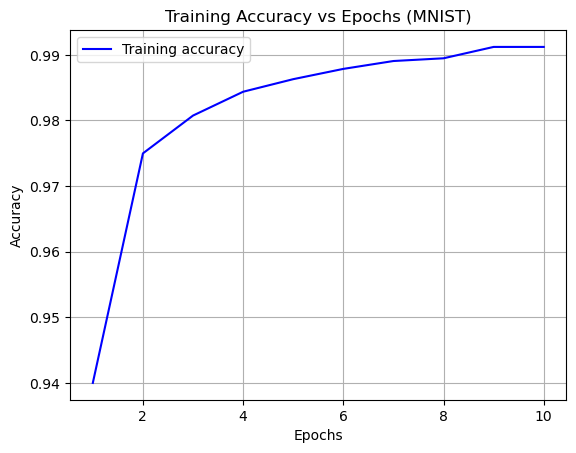

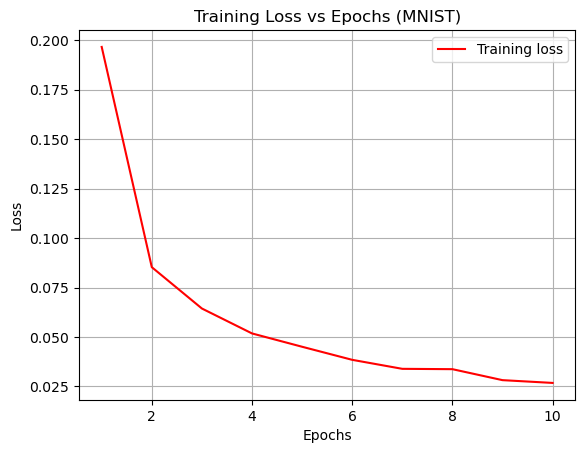

In [2]:
# Behavior along the training process
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training Accuracy vs Epochs (MNIST)')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training Loss vs Epochs (MNIST)')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [3]:
import tensorflow as tf
import os

cifar10 = tf.keras.datasets.cifar10

(x_train, y_train),(x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                                 activation='relu',
                                 input_shape=(32, 32, 3)))
model1.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(tf.keras.layers.Dropout(0.25))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(128, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, epochs=10)
model1.summary()

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model1.evaluate(x_test, y_test)
print("test loss, test acc:", results)

# Saving the model to disk
model_json = model1.to_json()
json_file = open("model_CNN_CIFAR10.json", "w")
json_file.write(model_json)
json_file.close()
model1.save_weights("model_CNN_CIFAR10.h5")
print("Model saved to disk")
os.getcwd()

Epoch 1/10


2024-04-11 11:14:42.582406: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 11s 6ms/step - loss: 1.5942 - accuracy: 0.4208
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2669 - accuracy: 0.5465
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1521 - accuracy: 0.5940
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0721 - accuracy: 0.6188
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0092 - accuracy: 0.6420
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9537 - accuracy: 0.6605
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9062 - accuracy: 0.6768
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8700 - accuracy: 0.6883
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8320 - accuracy: 0.7011
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8017 - accura

'/home/ariel/git/IA353_Redes_Neurais'

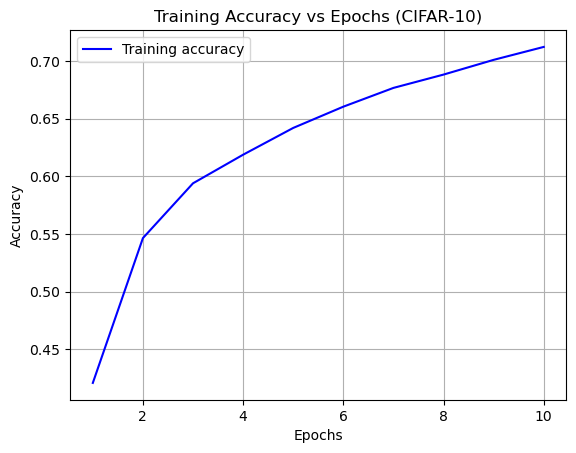

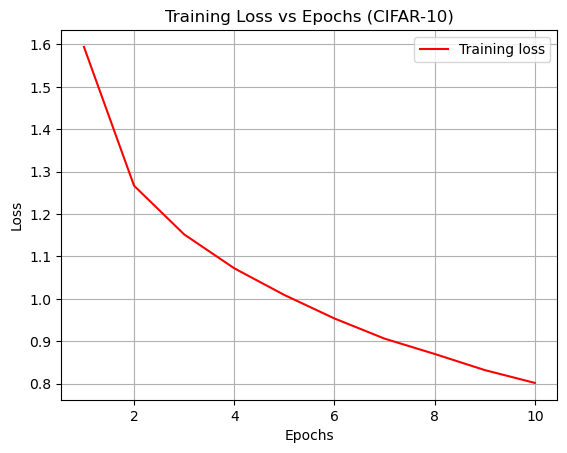

In [4]:
# Behavior along the training process
import matplotlib.pyplot as plt

acc = history1.history['accuracy']
loss = history1.history['loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training Accuracy vs Epochs (CIFAR-10)')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training Loss vs Epochs (CIFAR-10)')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [23]:
# Summary of the obtained results for the MNIST database
#classifier1 = 'Linear           '
classifier1 = 'Linear(RC)       '
classifier2 = 'ELM              '
classifier3 = 'MLP              '
classifier4 = 'CNN              '
print('--------------------------------------------------')
print('|       Accuracy for the MNIST database          |')
print('--------------------------------------------------')
print('|Classifier type \t Accuracy                |')
print('--------------------------------------------------')
#print('| %s: \t\t\t%f |'% (classifier1,0.0000))
print('| %s: \t\t\t%f |'% (classifier1,0.8604))
print('| %s: \t\t\t%f |'% (classifier2,0.9454))
print('| %s: \t\t\t%f |'% (classifier3,0.9829))
print('| %s: \t\t\t%f |'% (classifier4,0.9932))
print('--------------------------------------------------')
print("Layout: RC = RidgeClassifier")

--------------------------------------------------
|       Accuracy for the MNIST database          |
--------------------------------------------------
|Classifier type 	 Accuracy                |
--------------------------------------------------
| Linear(RC)       : 			0.860400 |
| ELM              : 			0.945400 |
| MLP              : 			0.982900 |
| CNN              : 			0.993200 |
--------------------------------------------------
Layout: RC = RidgeClassifier


In [24]:
# Summary of the obtained results for the CIFAR10 database
#classifier1 = 'Linear           '
classifier1 = 'Linear(RC)       '
classifier2 = 'ELM              '
classifier3 = 'MLP              '
classifier4 = 'CNN              '
print('--------------------------------------------------')
print('|      Accuracy for the CIFAR10 database         |')
print('--------------------------------------------------')
print('|Classifier type \t Accuracy                |')
print('--------------------------------------------------')
#print('| %s: \t\t\t%f |'% (classifier1,0.0000))
print('| %s: \t\t\t%f |'% (classifier1,0.3781))
print('| %s: \t\t\t%f |'% (classifier2,0.4607))
print('| %s: \t\t\t%f |'% (classifier3,0.5348))
print('| %s: \t\t\t%f |'% (classifier4,0.6967))
print('--------------------------------------------------')
print("Layout: RC = RidgeClassifier")

--------------------------------------------------
|      Accuracy for the CIFAR10 database         |
--------------------------------------------------
|Classifier type 	 Accuracy                |
--------------------------------------------------
| Linear(RC)       : 			0.378100 |
| ELM              : 			0.460700 |
| MLP              : 			0.534800 |
| CNN              : 			0.696700 |
--------------------------------------------------
Layout: RC = RidgeClassifier
